In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.5f}'.format
import igraph
from pandapower.plotting import simple_plot
from pandapower.shortcircuit.calc_sc import calc_sc

In [2]:
# from test.shortcircuit.test_1ph import single_3w_trafo_grid

from pandapower.create import create_empty_network, create_bus, create_ext_grid, create_transformer3w_from_parameters
def single_3w_trafo_grid(vector_group, sn_mva=123):
    net = create_empty_network(sn_mva=sn_mva)
    b1 = create_bus(net, vn_kv=380., geodata=(1, 1))
    b2 = create_bus(net, vn_kv=110., geodata=(0, 1))
    b3 = create_bus(net, vn_kv=30., geodata=(1, 0))
    create_ext_grid(net, b1, s_sc_max_mva=1000, s_sc_min_mva=800, rx_max=0.1, x0x_max=1, r0x0_max=0.1, rx_min=0.1,
                    x0x_min=1, r0x0_min=0.1)

    create_transformer3w_from_parameters(net, hv_bus=b1, mv_bus=b2, lv_bus=b3, vn_hv_kv=400, vn_mv_kv=120, vn_lv_kv=30,
                                         sn_hv_mva=350, sn_mv_mva=350, sn_lv_mva=50, pfe_kw=0, i0_percent=0,
                                         vk_hv_percent=21, vkr_hv_percent=.26, vk_mv_percent=7, vkr_mv_percent=.16,
                                         vk_lv_percent=10., vkr_lv_percent=.16, vk0_hv_percent=44.1,
                                         vkr0_hv_percent=0.26, vk0_mv_percent=6.2996, vkr0_mv_percent=0.03714,
                                         vk0_lv_percent=6.2996, vkr0_lv_percent=0.03714, vector_group=vector_group)
    return net

In [3]:
# beauftragt: Y0y0d5, YN0y0d5, Y0yn0d5, YN0yn0d5, Y0y0y0, Y0d5d5, YN0d5d5, Y0d5y0, Y0y0d11 und D0d0d0 
# implementiert zusätzlich: YNdy, Ydyn, YNdyn, YNyy

In [4]:
vg = "yyy"
net = single_3w_trafo_grid(vg)

1 in collections is of unknown type. Skipping


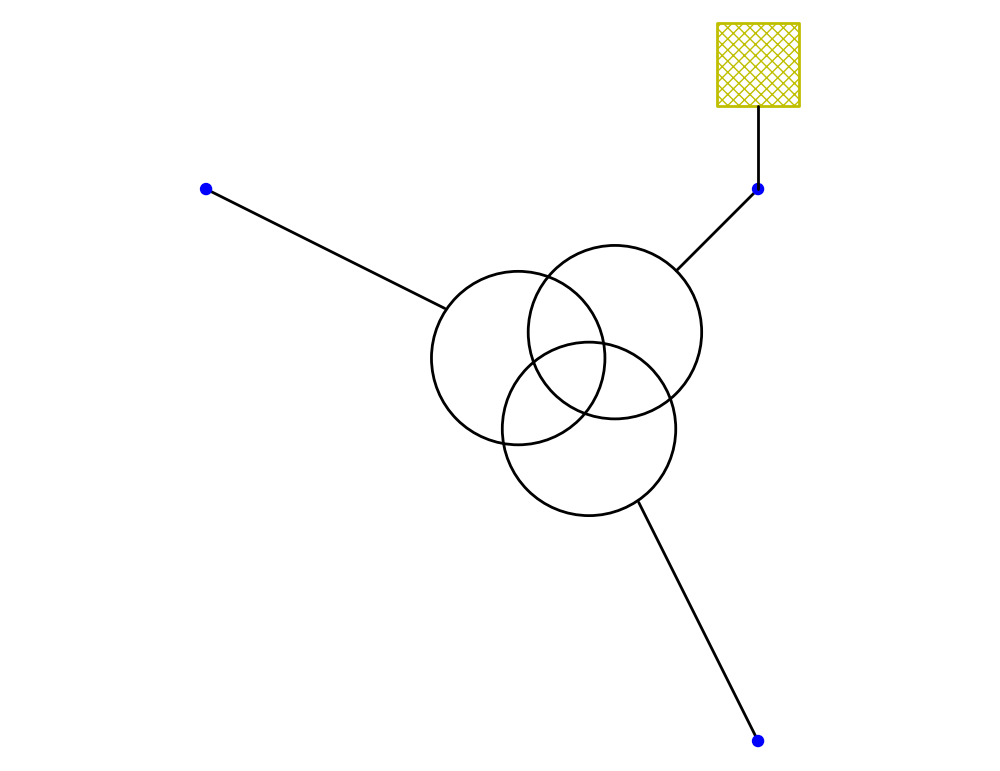

<Axes: >

In [5]:
simple_plot(net, ext_grid_size=5)

In [6]:
%%capture
net = single_3w_trafo_grid("Yyy")
calc_sc(net, fault="1ph", case="max")

In [7]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm   xk0_ohm   rk_ohm    xk_ohm
0  1.51934 15.80517 158.05171 15.80517 158.05171
1  0.00000      inf       inf  1.52174  22.24258
2  0.00000      inf       inf  0.11730   2.66335

In [8]:
%%capture
net = single_3w_trafo_grid("Ydd")
calc_sc(net, fault="1ph", case="max")

In [9]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm   xk0_ohm   rk_ohm    xk_ohm
0  1.51934 15.80517 158.05171 15.80517 158.05171
1  0.00000      inf       inf  1.52174  22.24258
2  0.00000      inf       inf  0.11730   2.66335

In [10]:
%%capture
net = single_3w_trafo_grid("Ddd")
calc_sc(net, fault="1ph", case="max")

In [11]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm   xk0_ohm   rk_ohm    xk_ohm
0  1.51934 15.80517 158.05171 15.80517 158.05171
1  0.00000      inf       inf  1.52174  22.24258
2  0.00000      inf       inf  0.11730   2.66335

In [12]:
%%capture
net = single_3w_trafo_grid("Yynd")
calc_sc(net, fault="1ph", case="max")

In [13]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm   xk0_ohm   rk_ohm    xk_ohm
0  1.51934 15.80517 158.05171 15.80517 158.05171
1  3.33940  0.10727  18.19496  1.52174  22.24258
2  0.00000      inf       inf  0.11730   2.66335

In [14]:
%%capture
net = single_3w_trafo_grid("Ydyn")  # Extra vector group
calc_sc(net, fault="1ph", case="max")

In [15]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm   xk0_ohm   rk_ohm    xk_ohm
0  1.51934 15.80517 158.05171 15.80517 158.05171
1  0.00000      inf       inf  1.52174  22.24258
2  8.83645  0.00670   1.13718  0.11730   2.66335

In [16]:
%%capture
net = single_3w_trafo_grid("YNynd")
calc_sc(net, fault="1ph", case="max")

In [17]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm  xk0_ohm   rk_ohm    xk_ohm
0  1.78326  5.12452 88.22838 15.80517 158.05171
1  3.49934  0.21021 15.31723  1.52174  22.24258
2  0.00000      inf      inf  0.11730   2.66335

In [18]:
%%capture
net = single_3w_trafo_grid("YNdyn")  # Extra vector group
calc_sc(net, fault="1ph", case="max")

In [19]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm  xk0_ohm   rk_ohm    xk_ohm
0  1.79376  4.86639 85.86380 15.80517 158.05171
1  0.00000      inf      inf  1.52174  22.24258
2  9.04239  0.01219  0.98955  0.11730   2.66335

In [20]:
%%capture
net = single_3w_trafo_grid("YNyd")
calc_sc(net, fault="1ph", case="max")

In [21]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm  xk0_ohm   rk_ohm    xk_ohm
0  1.78326  5.12452 88.22838 15.80517 158.05171
1  0.00000      inf      inf  1.52174  22.24258
2  0.00000      inf      inf  0.11730   2.66335

In [22]:
%%capture
net = single_3w_trafo_grid("YNdy")  # Extra vector group
calc_sc(net, fault="1ph", case="max")

In [23]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm  xk0_ohm   rk_ohm    xk_ohm
0  1.79376  4.86639 85.86380 15.80517 158.05171
1  0.00000      inf      inf  1.52174  22.24258
2  0.00000      inf      inf  0.11730   2.66335

In [24]:
%%capture
net = single_3w_trafo_grid("YNdd")
calc_sc(net, fault="1ph", case="max")

In [25]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm  xk0_ohm   rk_ohm    xk_ohm
0  1.84354  3.76841 75.01993 15.80517 158.05171
1  0.00000      inf      inf  1.52174  22.24258
2  0.00000      inf      inf  0.11730   2.66335

In [26]:
%%capture
net = single_3w_trafo_grid("YNyy")  # Extra vector group
calc_sc(net, fault="1ph", case="max")

In [27]:
display(net.res_bus_sc)  # warum dasselbe Ergebnis wie Yyy?

ikss_ka  rk0_ohm   xk0_ohm   rk_ohm    xk_ohm
0  1.51934 15.80517 158.05171 15.80517 158.05171
1  0.00000      inf       inf  1.52174  22.24258
2  0.00000      inf       inf  0.11730   2.66335

# Single-bus fault

all-bus fault vs single-bus fault vs LU factorization

## Ynynd

In [28]:
%%capture
net = single_3w_trafo_grid("Ynynd")  
calc_sc(net, fault="1ph", case="max")

In [29]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm  xk0_ohm   rk_ohm    xk_ohm
0  1.78326  5.12452 88.22838 15.80517 158.05171
1  3.49934  0.21021 15.31723  1.52174  22.24258
2  0.00000      inf      inf  0.11730   2.66335

In [30]:
%%capture
net = single_3w_trafo_grid("Ynynd")  
calc_sc(net, fault="1ph", case="max", bus=0)

In [31]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm  xk0_ohm   rk_ohm    xk_ohm
0  1.78326  5.12452 88.22838 15.80517 158.05171

In [32]:
%%capture
# now with LU factorization instead of Y inversion
net = single_3w_trafo_grid("Ynynd")  
calc_sc(net, fault="1ph", case="max", bus=0, inverse_y=False)

In [33]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm  xk0_ohm   rk_ohm    xk_ohm
0  1.78326  5.12452 88.22838 15.80517 158.05171

In [34]:
%%capture
# now with LU factorization instead of Y inversion
net = single_3w_trafo_grid("Ynynd")  
calc_sc(net, fault="1ph", case="max", bus=1, inverse_y=False)

In [35]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm  xk0_ohm  rk_ohm   xk_ohm
1  3.49934  0.21021 15.31723 1.52174 22.24258

In [36]:
%%capture
# now with LU factorization instead of Y inversion
net = single_3w_trafo_grid("Ynynd")  
calc_sc(net, fault="1ph", case="max", bus=2, inverse_y=False)

In [37]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm  xk0_ohm  rk_ohm  xk_ohm
2  0.00000      inf      inf 0.11730 2.66335

## Ydd

In [38]:
%%capture
net = single_3w_trafo_grid("Ydd")  
calc_sc(net, fault="1ph", case="max")

In [39]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm   xk0_ohm   rk_ohm    xk_ohm
0  1.51934 15.80517 158.05171 15.80517 158.05171
1  0.00000      inf       inf  1.52174  22.24258
2  0.00000      inf       inf  0.11730   2.66335

In [40]:
%%capture
net = single_3w_trafo_grid("Ydd")  
calc_sc(net, fault="1ph", case="max", bus=0, inverse_y=False)

In [41]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm   xk0_ohm   rk_ohm    xk_ohm
0  1.51934 15.80517 158.05171 15.80517 158.05171

In [42]:
%%capture
net = single_3w_trafo_grid("Ydd")  
calc_sc(net, fault="1ph", case="max", bus=1, inverse_y=False)

In [43]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm  xk0_ohm  rk_ohm   xk_ohm
1  0.00000      inf      inf 1.52174 22.24258

In [44]:
%%capture
net = single_3w_trafo_grid("Ydd")  
calc_sc(net, fault="1ph", case="max", bus=2, inverse_y=False)

In [45]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm  xk0_ohm  rk_ohm  xk_ohm
2  0.00000      inf      inf 0.11730 2.66335

## YNyd

In [46]:
%%capture
net = single_3w_trafo_grid("YNyd")  
calc_sc(net, fault="1ph", case="max")

In [47]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm  xk0_ohm   rk_ohm    xk_ohm
0  1.78326  5.12452 88.22838 15.80517 158.05171
1  0.00000      inf      inf  1.52174  22.24258
2  0.00000      inf      inf  0.11730   2.66335

In [48]:
%%capture
net = single_3w_trafo_grid("YNyd")  
calc_sc(net, fault="1ph", case="max", bus=0, inverse_y=False)

In [49]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm  xk0_ohm   rk_ohm    xk_ohm
0  1.78326  5.12452 88.22838 15.80517 158.05171

In [50]:
%%capture
net = single_3w_trafo_grid("YNyd")  
calc_sc(net, fault="1ph", case="max", bus=1, inverse_y=False)

In [51]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm  xk0_ohm  rk_ohm   xk_ohm
1  0.00000      inf      inf 1.52174 22.24258

In [52]:
%%capture
net = single_3w_trafo_grid("YNyd")  
calc_sc(net, fault="1ph", case="max", bus=2, inverse_y=False)

In [53]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm  xk0_ohm  rk_ohm  xk_ohm
2  0.00000      inf      inf 0.11730 2.66335

## YNdd

In [54]:
%%capture
net = single_3w_trafo_grid("YNdd")  
calc_sc(net, fault="1ph", case="max")

In [55]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm  xk0_ohm   rk_ohm    xk_ohm
0  1.84354  3.76841 75.01993 15.80517 158.05171
1  0.00000      inf      inf  1.52174  22.24258
2  0.00000      inf      inf  0.11730   2.66335

In [56]:
%%capture
net = single_3w_trafo_grid("YNdd")  
calc_sc(net, fault="1ph", case="max", bus=0, inverse_y=False)

In [57]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm  xk0_ohm   rk_ohm    xk_ohm
0  1.84354  3.76841 75.01993 15.80517 158.05171

In [58]:
%%capture
net = single_3w_trafo_grid("YNdd")  
calc_sc(net, fault="1ph", case="max", bus=1, inverse_y=False)

In [59]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm  xk0_ohm  rk_ohm   xk_ohm
1  0.00000      inf      inf 1.52174 22.24258

In [60]:
%%capture
net = single_3w_trafo_grid("YNdd")  
calc_sc(net, fault="1ph", case="max", bus=2, inverse_y=False)

In [61]:
display(net.res_bus_sc)

ikss_ka  rk0_ohm  xk0_ohm  rk_ohm  xk_ohm
2  0.00000      inf      inf 0.11730 2.66335

For further vector groups, we included the check in the test, all the vector groups passed.